# SINGLE TRACKING  ANALYSIS 

# IMPORTS 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.colors import LogNorm
import datetime
import time

# DATA 

## FILENAME

In [2]:
stats_csv = '/eos/user/p/plawski/SWAN_projects/RzymskiKociolek/Histograms/analysis_multi_single/data/multi/PROMO_MERGED/4499/9920/statistics.csv'

## DATAFRAME 

In [3]:
print("Start loading at time: {}".format(datetime.datetime.now().time()))
load_start = time.time()
stats_df = pd.read_csv(stats_csv)
load_exec = time.time() - load_start
print("\tLoaded in {} [sec]".format(load_exec))

Start loading at time: 15:52:21.461157
	Loaded in 246.281942844 [sec]


## CONSTS 

In [4]:
# TRACK TYPES
TRACK_1A = '_11_1X1_3RP_1X1'
TRACK_1B = '_12_1X1_3RP_MORE'
TRACK_2 = '_21_2X2_3RP_ENOUGH'

# TRACK_TYPES
TRACK_TYPES = [TRACK_1A, TRACK_1B, TRACK_2, None]

# DF COLUMNS
TRACK_TYPE_COL = 'track_type'
CHI2N_COL = 'chi2_N'
DIST_AVG_COL = 'dist_avg'
EXEC_TIME_COL = 'exec_time[s]'

# COLUMNS
COLUMNS = [CHI2N_COL, DIST_AVG_COL, EXEC_TIME_COL]


# TRANSLATIONS
TRACK_TYPE_TO_COLOR = {
    TRACK_1A : [0.50, 0.8, 0.1, 1], 
    TRACK_1B : [0.30, 0.3, 0.9, 1], 
    TRACK_2 : [1.00, 0.0, 0.0, 1]
}

# TRACK_TYPE_TO_TYPE_STR
TRACK_TYPE_TO_TYPE_STR = {
    TRACK_1A : '1A',
    TRACK_1B : '1B',
    TRACK_2 : '2',
    None : 'All'
}


# COLUMN TO BINS
COLUMN_TO_BINS = {
    CHI2N_COL : np.arange(0.0, 100.0, 1.0), 
    DIST_AVG_COL : np.arange(0.0, 12.0, 0.0659), 
    EXEC_TIME_COL : np.arange(0.0, 1.0, 0.01) 
    
}

# COLUMN TO X LABEL
COLUMN_TO_X_LABEL = {
    CHI2N_COL : 'Normalized Chi2 statistics', 
    DIST_AVG_COL : 'Average distance [mm]', 
    EXEC_TIME_COL : 'Fitting time [s]' 
    
}

# COLUMN TO TITLE
COLUMN_TO_TITLE = {
    CHI2N_COL : 'Statistics of normalized Chi2.',
    DIST_AVG_COL : 'Average distance between track and activated strips.', 
    EXEC_TIME_COL : 'Time of track reconstruction'
}

# COLUMN_TO_STR
COLUMN_TO_STR = {
    CHI2N_COL : 'CHI2N_COL',
    DIST_AVG_COL : 'DIST_AVG_COL', 
    EXEC_TIME_COL : 'EXEC_TIME_COL'
}



In [5]:
len(stats_df)

25934278

# PLOTS 

In [6]:
'''
It should be easy:
- Plot parameters --> column, track_type
- Plot color --> based on track_type --> three color
- Bins --> based on column
- x_label --> based on column
- title --> column + track_type
'''

'\nIt should be easy:\n- Plot parameters --> column, track_type\n- Plot color --> based on track_type --> three color\n- Bins --> based on column\n- x_label --> based on column\n- title --> column + track_type\n'

In [7]:
def save_bin_result(df_name, stats_png_base, bin_result=None, total_number=None):
#     print(bin_result)
#     print(bin_result.__class__)
#     arr_values = bin_result[0]
#     arr_bins = bin_result[1]
#     print("values: {} bins: {}".format(len(arr_values), len(arr_bins)))
    bin_values = bin_result[0]
    bin_starts = bin_result[1][:-1]
    bin_percent = [float(value) / total_number * 100 for value in bin_values]
    bin_stack_percent = [sum(bin_percent[:idx+1]) for idx in range(len(bin_percent))]
    
    pd_dict = {
        'bin_values' : bin_values,
        'bin_starts' : bin_starts,
        'bin_percent' : bin_percent,
        'bin_stack_percent' : bin_stack_percent
    }
    
    df = pd.DataFrame(data=pd_dict)
    df_filename_csv = stats_png_base + df_name + '.csv'
    df.to_csv(df_filename_csv)

In [8]:
stats_df[DIST_AVG_COL].mean()

0.1787648066358895

In [9]:
stats_df[DIST_AVG_COL].std()

0.7894460881480723

In [10]:
def plot_statistics(column, track_type=None): 
    stats_png_base = '/eos/user/p/plawski/SWAN_projects/RzymskiKociolek/Histograms/analysis_multi_single/code/multi/stats_png/'
    
    df = stats_df
    bins = COLUMN_TO_BINS[column]    
    x_label = COLUMN_TO_X_LABEL[column]
    title = COLUMN_TO_TITLE[column]
    
    if track_type is not None:
        df = stats_df.loc[stats_df[TRACK_TYPE_COL] == track_type]
        color = TRACK_TYPE_TO_COLOR[track_type]
        title = title + '\nAll tracks of type: {}'.format(TRACK_TYPE_TO_TYPE_STR[track_type])
    else:
        color = None
        title = title + '\nAll tracks type.'
        
        
    if column == EXEC_TIME_COL and track_type == TRACK_2:
        bins = np.arange(0.0, 5.0, 0.05)

    print("\tTotal number:\t{}".format(len(df)))
    print("\tMean:\t{}".format(df[column].mean()))
    print("\tStd:\t{}".format(df[column].std()))

        
#     print("Total lenght: {}".format(len(df)))
#     column = DF_NAME_TO_COLUMN[df_name]
#     bins = DF_NAME_TO_BINS[df_name]
#     x_label = DF_NAME_TO_X_LABEL[df_name]
#     color = DF_NAME_TO_COLOR[df_name]
#     title = DF_NAME_TO_TITLE[df_name]
    
    sns.set(font_scale=1.0)
    figure(figsize=(12, 9), dpi=100)
    
    df_name = TRACK_TYPE_TO_TYPE_STR[track_type] + '_' + COLUMN_TO_STR[column]
    bin_result = plt.hist(df[column], bins=bins, color=color)
    save_bin_result(df_name, stats_png_base, bin_result=bin_result, total_number=len(df))
    
    plt.yscale('log', nonposy='clip')
    plt.xlabel(x_label)
    plt.ylabel('Number of tracks')
    plt.title(title)
    
    # Create filename
    stats_png_filename = stats_png_base + TRACK_TYPE_TO_TYPE_STR[track_type] + '_' + COLUMN_TO_STR[column] + '.png' 
    plt.savefig(stats_png_filename) 
    
    plt.show()

In [11]:
def plot_all_statistics():
    for track_type in TRACK_TYPES:
        print("Plotting: {}".format(track_type))
        for column in COLUMNS:            
            print("Column: {}".format(column))
            print("\tStarts at {}".format(datetime.datetime.now().time()))
            time_start = time.time()
            plot_statistics(column, track_type=track_type)
            time_exec = time.time() - time_start
            print("\tPlotted in: {} [s]\n".format(time_exec))

Plotting: _11_1X1_3RP_1X1
Column: chi2_N
	Starts at 15:56:28.212547
	Total number:	16736394
	Mean:	173.776969333
	Std:	8094.90201863


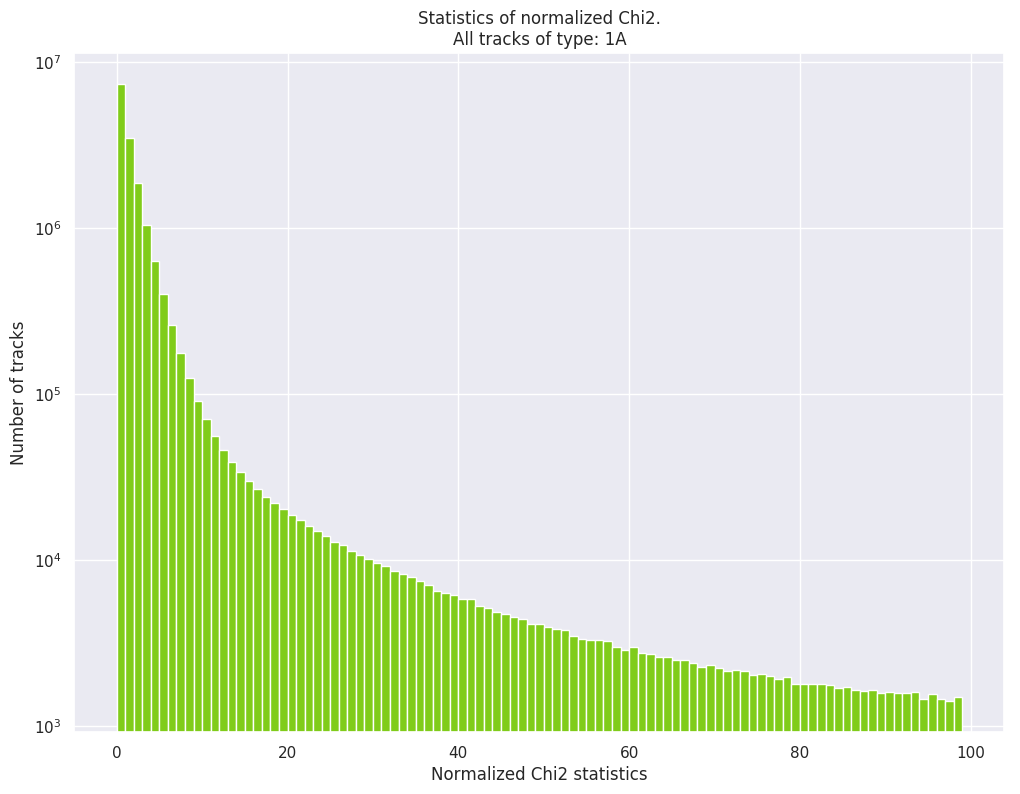

	Plotted in: 6.70709705353 [s]

Column: dist_avg
	Starts at 15:56:34.919998
	Total number:	16736394
	Mean:	0.0805328422108
	Std:	0.358792075948


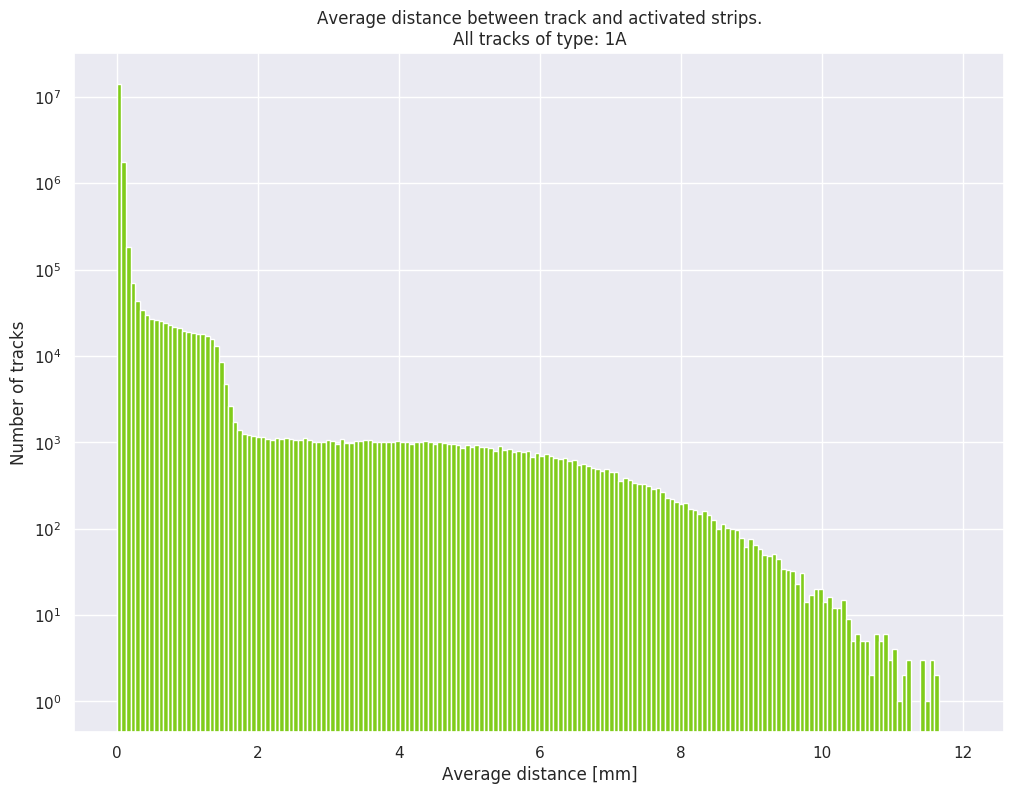

	Plotted in: 6.65336608887 [s]

Column: exec_time[s]
	Starts at 15:56:41.573879
	Total number:	16736394
	Mean:	0.0323799773557
	Std:	0.0156407065501


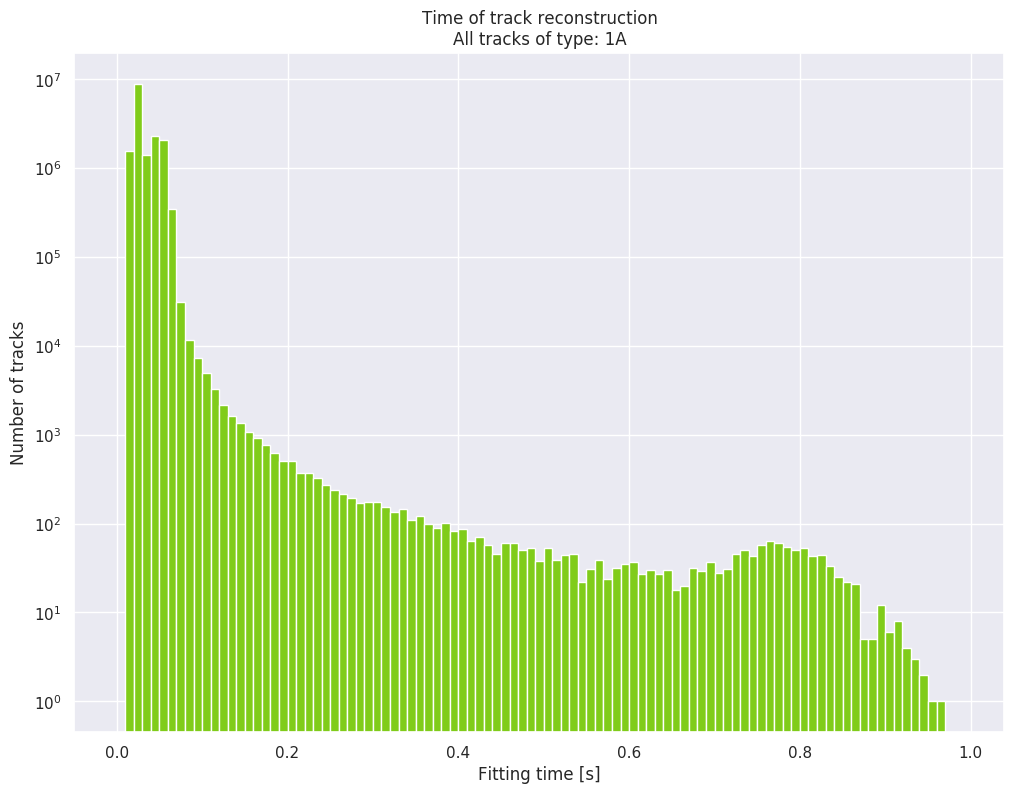

	Plotted in: 6.29148411751 [s]

Plotting: _12_1X1_3RP_MORE
Column: chi2_N
	Starts at 15:56:47.865988
	Total number:	5505670
	Mean:	2415.73498147
	Std:	180137.281353


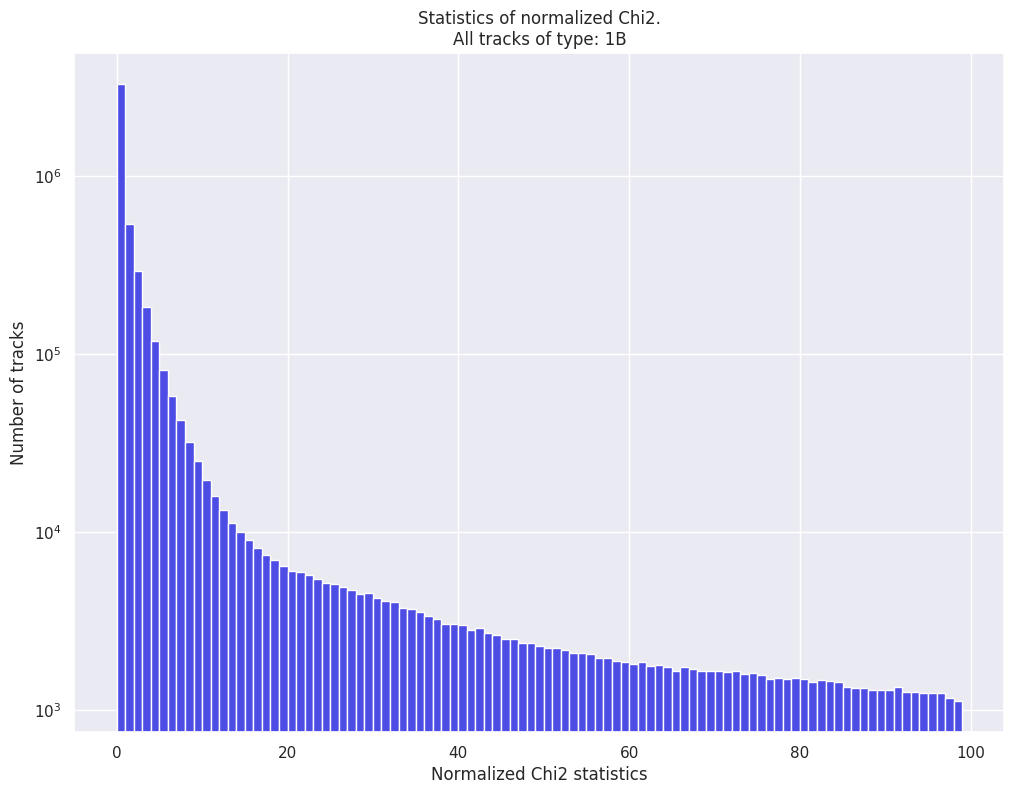

	Plotted in: 5.32592105865 [s]

Column: dist_avg
	Starts at 15:56:53.192751
	Total number:	5505670
	Mean:	0.279584738746
	Std:	1.34456916447


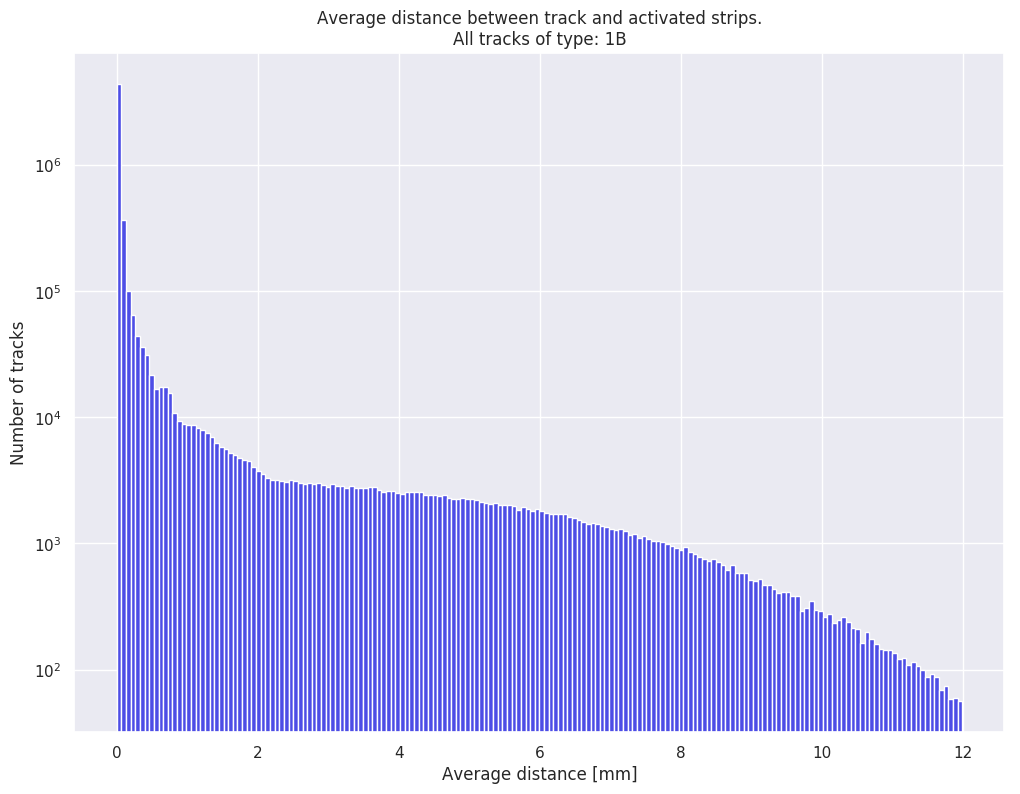

	Plotted in: 4.34374713898 [s]

Column: exec_time[s]
	Starts at 15:56:57.536885
	Total number:	5505670
	Mean:	0.0608822174072
	Std:	0.0843859969975


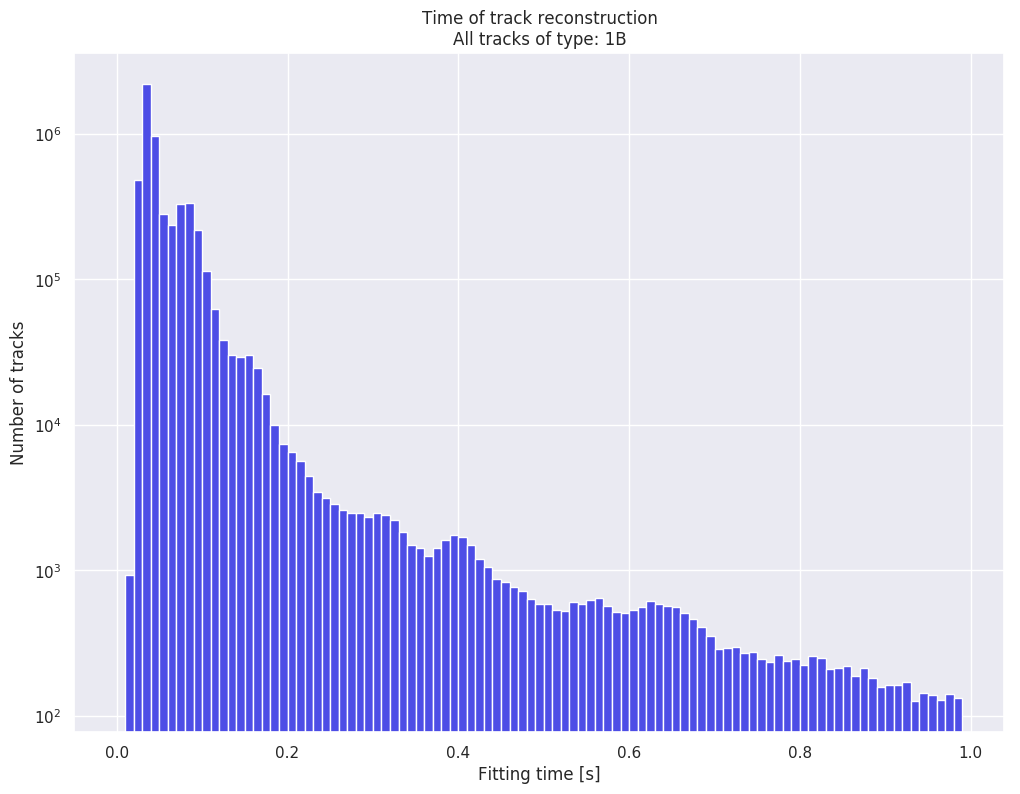

	Plotted in: 3.95190620422 [s]

Plotting: _21_2X2_3RP_ENOUGH
Column: chi2_N
	Starts at 15:57:01.489573
	Total number:	3692214
	Mean:	1871.05294517
	Std:	15727.4324939


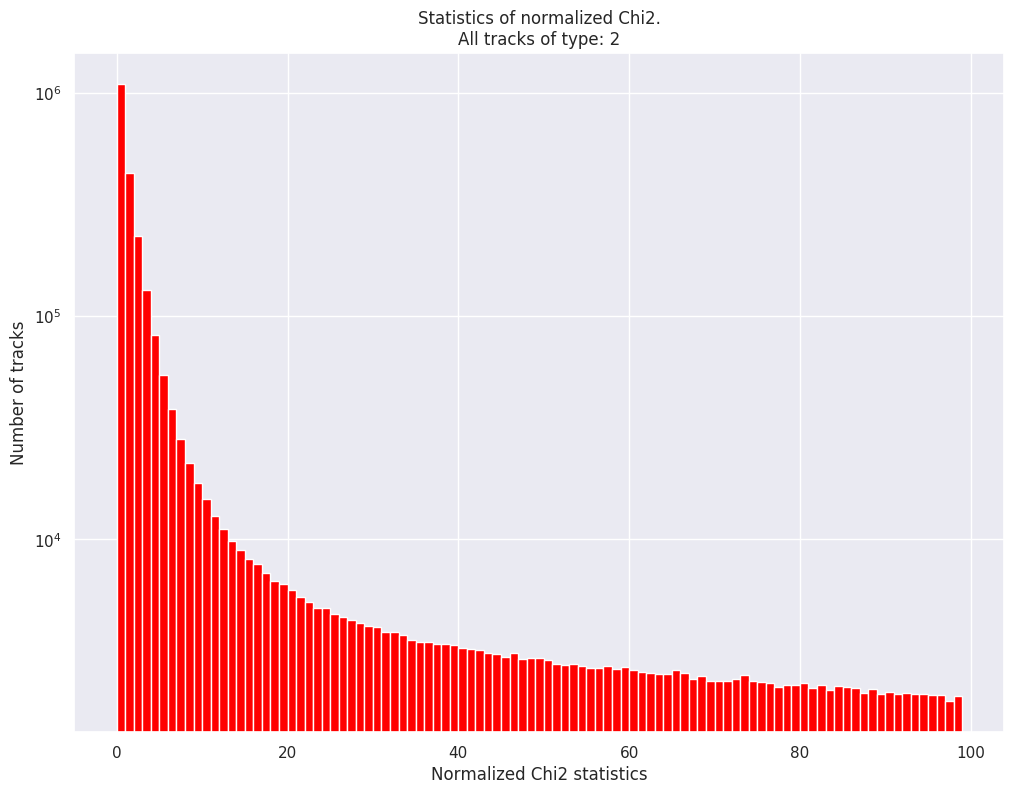

	Plotted in: 4.11962294579 [s]

Column: dist_avg
	Starts at 15:57:05.609889
	Total number:	3692214
	Mean:	0.473701011415
	Std:	0.975878428596


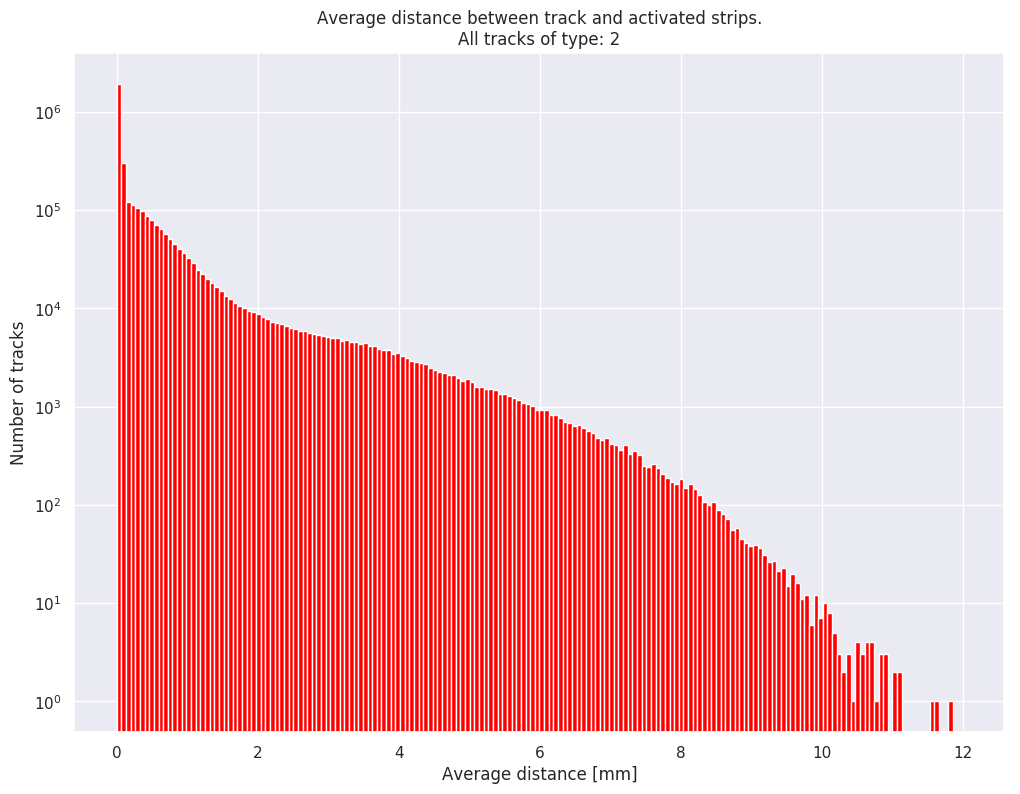

	Plotted in: 4.70484900475 [s]

Column: exec_time[s]
	Starts at 15:57:10.315156
	Total number:	3692214
	Mean:	0.577308704115
	Std:	0.324955801313


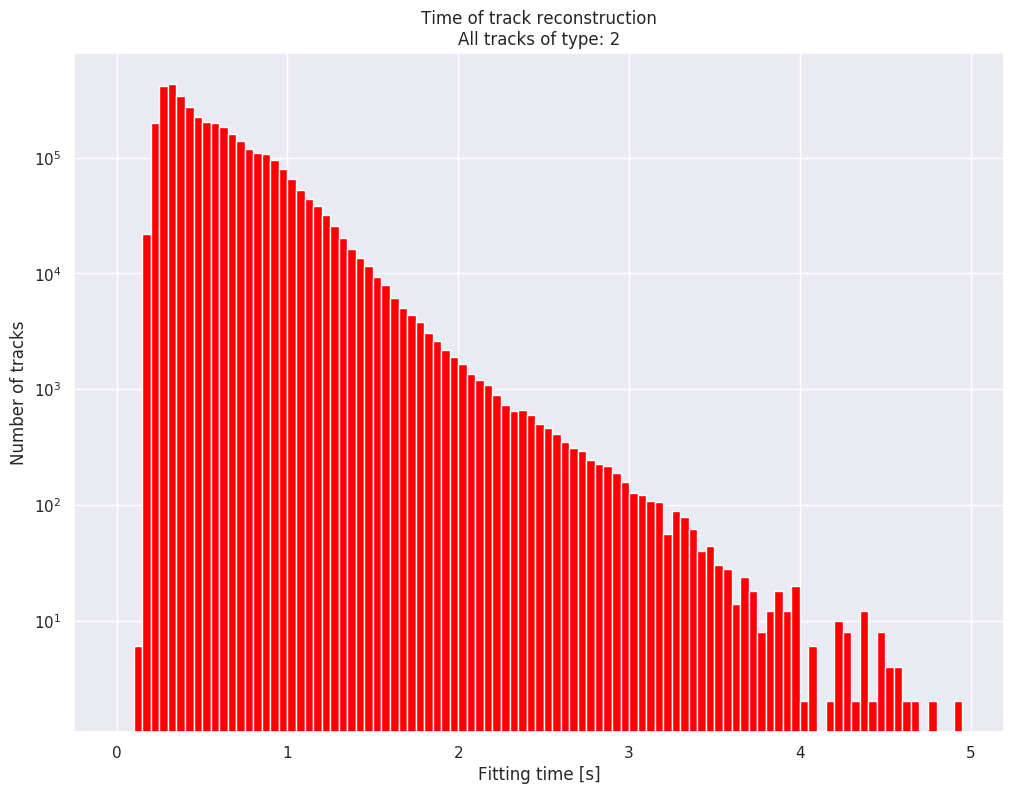

	Plotted in: 5.00906014442 [s]

Plotting: None
Column: chi2_N
	Starts at 15:57:15.325144
	Total number:	25934278
	Mean:	891.36729857
	Std:	83470.1030876


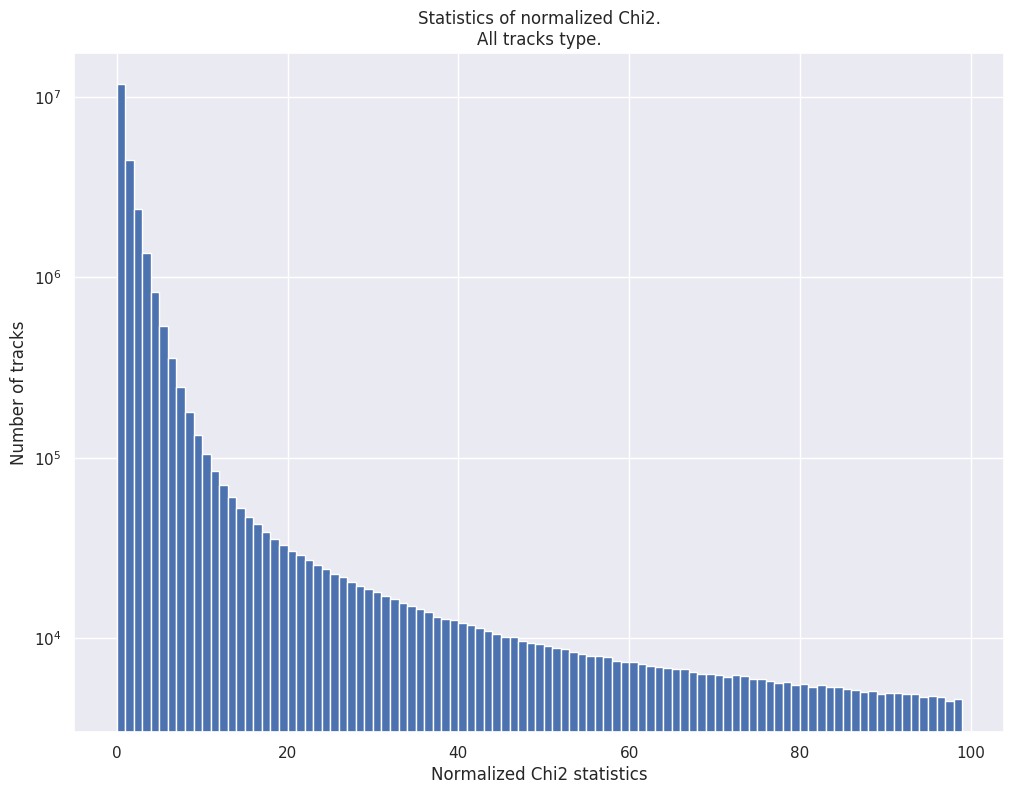

	Plotted in: 3.44115805626 [s]

Column: dist_avg
	Starts at 15:57:18.767005
	Total number:	25934278
	Mean:	0.178764806636
	Std:	0.789446088148


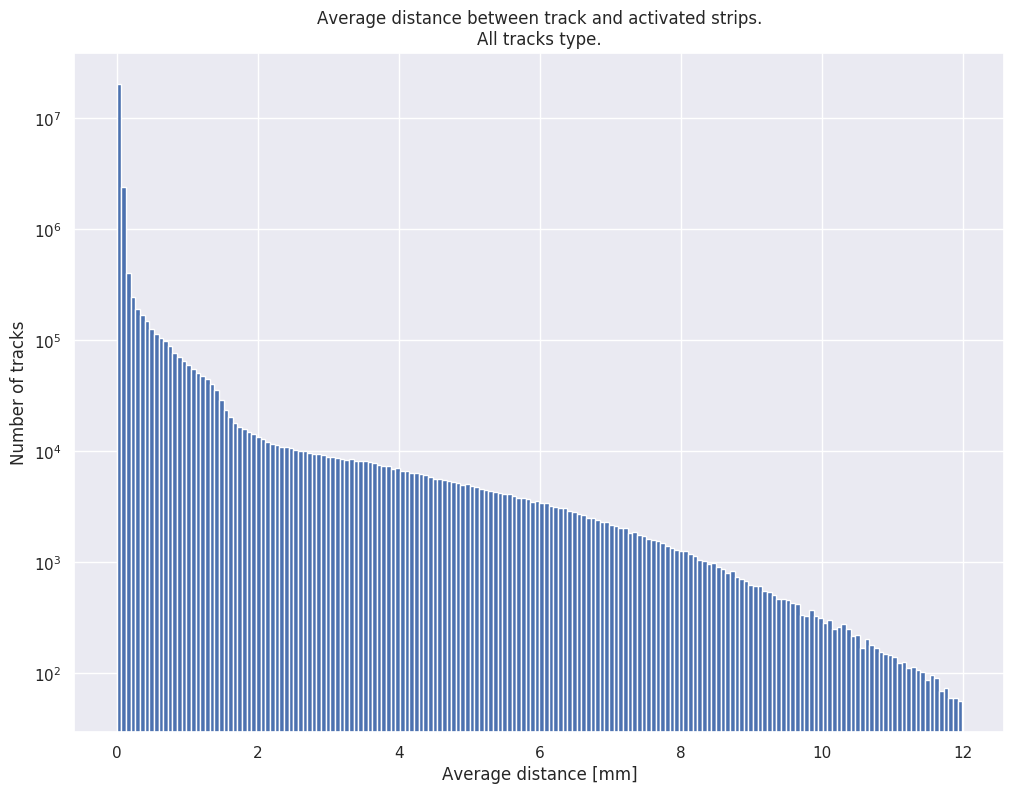

	Plotted in: 3.82695102692 [s]

Column: exec_time[s]
	Starts at 15:57:22.594305
	Total number:	25934278
	Mean:	0.116011278059
	Std:	0.228379601811


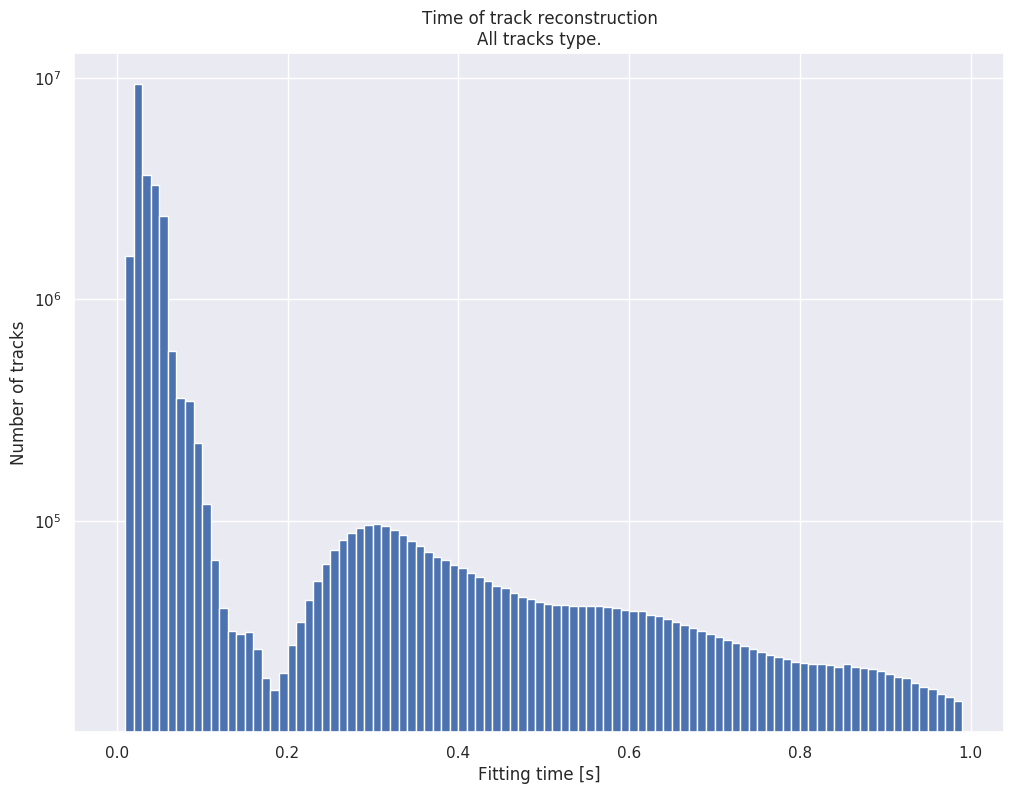

	Plotted in: 4.16050815582 [s]



In [12]:
plot_all_statistics()

In [13]:
file_base = '/eos/user/p/plawski/SWAN_projects/RzymskiKociolek/Histograms/analysis_multi_single/code/multi/stats_png/'
chi2n_all_df = pd.read_csv(file_base + 'All_DIST_AVG_COL.csv')
chi2n_all_df

,Unnamed: 0,bin_percent,bin_stack_percent,bin_starts,bin_values
0,0,79.405045,79.405045,0.0000,20593125.0
1,1,9.277964,88.683009,0.0659,2406173.0
2,2,1.563757,90.246765,0.1318,405549.0
3,3,0.949169,91.195934,0.1977,246160.0
4,4,0.745793,91.941727,0.2636,193416.0
5,5,0.649654,92.591380,0.3295,168483.0
6,6,0.571888,93.163268,0.3954,148315.0
7,7,0.490428,93.653696,0.4613,127189.0
8,8,0.437005,94.090701,0.5272,113334.0
9,9,0.409069,94.499770,0.5931,106089.0
